<a href="https://colab.research.google.com/github/denistoo749/Iris-Computer-Vision/blob/main/iris_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Computer Vision
- Classify Fisher's three classic irises by image

**Data**
- he dataset presented here provides images for the space species of iris that were chosen by Fisher. Can you classify iris images with computer vision?
>https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision

In [1]:
# Unzip files
# !unzip '/content/drive/MyDrive/Iris Computer Vision/archive.zip' -d '/content/drive/MyDrive/Iris Computer Vision/data/'

# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import json
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
# Set up paths
data = '/content/drive/MyDrive/Iris Computer Vision/data/'

# ImageDataGenerator for training with augmentation and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 338 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


# Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: setosa, versicolor, virginica
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model:

Fit the model using the training and validation generators.

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25
)

Epoch 1/25
10/10 [==============================] - 9s 436ms/step - loss: 1.7305 - accuracy: 0.5098 - val_loss: 1.0000 - val_accuracy: 0.6406
Epoch 2/25
10/10 [==============================] - 5s 507ms/step - loss: 0.9598 - accuracy: 0.6340 - val_loss: 0.9522 - val_accuracy: 0.6250
Epoch 3/25
10/10 [==============================] - 4s 416ms/step - loss: 0.9064 - accuracy: 0.6340 - val_loss: 0.8458 - val_accuracy: 0.6875
Epoch 4/25
10/10 [==============================] - 4s 388ms/step - loss: 0.8963 - accuracy: 0.6242 - val_loss: 0.9934 - val_accuracy: 0.5938
Epoch 5/25
10/10 [==============================] - 5s 466ms/step - loss: 0.9035 - accuracy: 0.6275 - val_loss: 0.8644 - val_accuracy: 0.6719
Epoch 6/25
10/10 [==============================] - 4s 436ms/step - loss: 0.8462 - accuracy: 0.6375 - val_loss: 0.9053 - val_accuracy: 0.6406
Epoch 7/25
10/10 [==============================] - 5s 481ms/step - loss: 0.8184 - accuracy: 0.6500 - val_loss: 0.8925 - val_accuracy: 0.6406
Epoch 

# Plotting Training and Validation Metrics

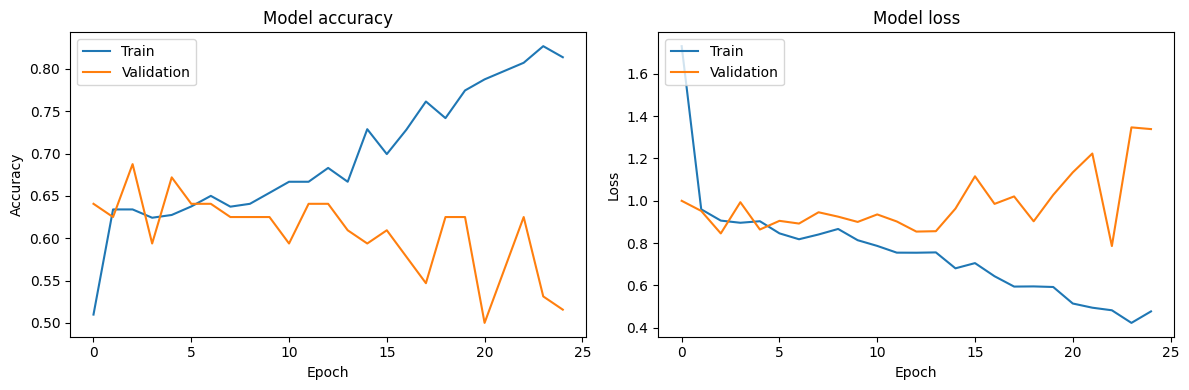

In [6]:
# Access the history dictionary
history_dict = history.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Accessing the History Data

In [7]:
# Print the keys of the history object
print(history.history.keys())

# Print the accuracy for each epoch
print(history.history['accuracy'])

# Print the validation loss for each epoch
print(history.history['val_loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.5098039507865906, 0.6339869499206543, 0.6339869499206543, 0.6241829991340637, 0.6274510025978088, 0.637499988079071, 0.6499999761581421, 0.6372548937797546, 0.640625, 0.6535947918891907, 0.6666666865348816, 0.6666666865348816, 0.6830065250396729, 0.6666666865348816, 0.7287581562995911, 0.6993464231491089, 0.7281249761581421, 0.7614378929138184, 0.741830050945282, 0.7745097875595093, 0.7875816822052002, 0.7973856329917908, 0.8071895241737366, 0.826797366142273, 0.813725471496582]
[0.9999868273735046, 0.9521578550338745, 0.8458374738693237, 0.99336838722229, 0.8643621802330017, 0.9053326845169067, 0.8925123810768127, 0.9458498954772949, 0.9251077175140381, 0.9002067446708679, 0.9356457591056824, 0.902357816696167, 0.8546159863471985, 0.8564460277557373, 0.9630250930786133, 1.1157293319702148, 0.9854238033294678, 1.0206786394119263, 0.9031581878662109, 1.0278112888336182, 1.1341850757598877, 1.2233695983886719, 0.7861698865890

# Saving Training History

In [8]:
# Save history to a JSON file
with open('/content/drive/MyDrive/Iris Computer Vision/training_history.json', 'w') as f:
    json.dump(history.history, f)

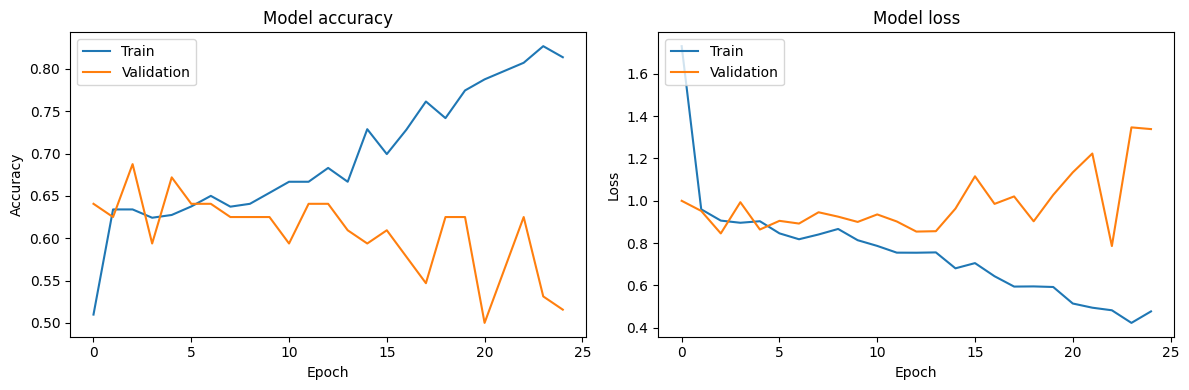

In [9]:
# Load history from a JSON file
with open('/content/drive/MyDrive/Iris Computer Vision/training_history.json', 'r') as f:
    history = json.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluate and Save the Model

In [10]:
model.evaluate(validation_generator)
model.save('/content/drive/MyDrive/Iris Computer Vision/iris_classification_model.keras')

3/3 [==============================] - 2s 583ms/step - loss: 1.2323 - accuracy: 0.5663
